In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
#this program tests a moving average trading strategy over a year period for aapl
#when the 5 day moving average of the closing price
#is greater than the 30 day moving average,
#we buy and hold for one day
#otherwise, we do nothing
#import AAPL's stock data, add two columns - MA5 and MA30
aapl = pd.read_csv('aapl1yr.csv')
aapl['MA5'] = aapl['Close'].rolling(5).mean()
aapl['MA30'] = aapl['Close'].rolling(30).mean()
aapl = aapl.dropna()
aapl.head()

,Date,Open,High,Low,Close,Volume,MA5,MA30
29,10/19/2020,119.96,120.42,115.66,115.98,"120,639,297",119.600,114.636667
30,10/20/2020,116.20,118.98,115.63,117.51,"124,423,695",118.882,114.793000
31,10/21/2020,116.67,118.71,116.45,116.87,"89,945,984",118.018,114.778000
32,10/22/2020,117.45,118.04,114.59,115.75,"101,988,000",117.026,114.853333
33,10/23/2020,116.39,116.55,114.28,115.04,"82,572,648",116.230,114.954667


In [3]:
#create signal -- 1 means long 1 share, 0 means do nothing
aapl['Shares'] = [1 if aapl.loc[ei, 'MA5']>aapl.loc[ei, 'MA30'] else 0 for ei in aapl.index]

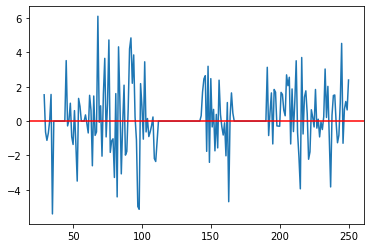

In [4]:
#adding a profit column
#plot a graph to show the p/l

aapl['Close1'] = aapl['Close'].shift(-1)
aapl['Profit'] = [aapl.loc[ei, 'Close1'] - aapl.loc[ei, 'Close'] if aapl.loc[ei, 'Shares'] == 1
                  else 0 for ei in aapl.index]
aapl['Profit'].plot()
plt.pyplot.axhline(y=0, color='red')

In [5]:
#use .cumsum() to calculate the accumulated wealth over the period

aapl['Wealth'] = aapl['Profit'].cumsum()
aapl.tail()

,Date,Open,High,Low,Close,Volume,MA5,MA30,Shares,Close1,Profit,Wealth
247,8/31/2021,152.66,152.80,151.29,151.83,"86,453,117",149.890,147.763667,1,152.51,0.68,31.74
248,9/1/2021,152.83,154.98,152.34,152.51,"80,313,711",150.720,148.000667,1,153.65,1.14,32.88
249,9/2/2021,153.87,154.72,152.40,153.65,"71,171,320",151.942,148.229000,1,154.30,0.65,33.53
250,9/3/2021,153.76,154.63,153.09,154.30,"57,866,070",153.082,148.420333,1,156.69,2.39,35.92
251,9/7/2021,154.97,157.26,154.39,156.69,"82,120,100",153.796,148.677000,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 35.920000000000016')

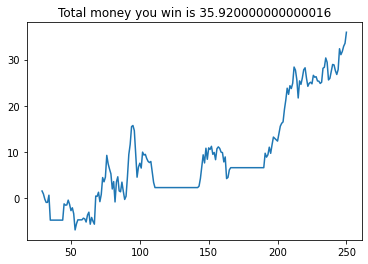

In [6]:
#plot the wealth to show the growth of profit over the period

aapl['Wealth'].plot()
plt.pyplot.title('Total money you win is {}'.format(aapl.loc[aapl.index[-2], 'Wealth']))

In [7]:
#compare to buy and hold
#this strategy underperforms buy and hold
#starting on day 29

bandlprofit = aapl.loc[aapl.index[-2], 'Close'] - aapl.loc[aapl.index[0], 'Close']
bandlprofit

38.32000000000001